# Setup

## Imports

In [36]:
from utils import *

## Useful Features

In [37]:
jtplot_style()

In [38]:
def set_data(data):
    global train_model
    from functools import partial
    train_model = partial(train_model, data=data)

## Create Training Set

In [4]:
data = feather.read_dataframe(DIR_DATA / 'train.ft')

In [7]:
 x, y, nas = proc_df(data, 'Survived')

In [8]:
x.head()

Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  Embarked  Age_na
0       3    2  22.0      1      0     524   7.2500      0         3   False
1       1    1  38.0      1      0     597  71.2833     82         1   False
2       3    1  26.0      0      0     670   7.9250      0         3   False
3       1    1  35.0      1      0      50  53.1000     56         3   False
4       3    2  35.0      0      0     473   8.0500      0         3   False

# Train Model

In [11]:
model = RandomForestClassifier(n_estimators=10)

In [21]:
model.fit(x, y)
model.score(x, y)

0.9797979797979798

## Split Into Validation Set

In [24]:
(x, y), (x_val, y_val) = split_val(x, y, frac=0.2)

In [39]:
set_data(((x, y), (x_val, y_val)))

In [40]:
model = train_model(RandomForestClassifier(10))

Training: 98.455 %
Validation: 83.240 %


## Single Tree

In [48]:
model = train_model(RandomForestClassifier(1, max_depth=3, bootstrap=False, n_jobs=-1))

Training: 80.758 %
Validation: 83.799 %


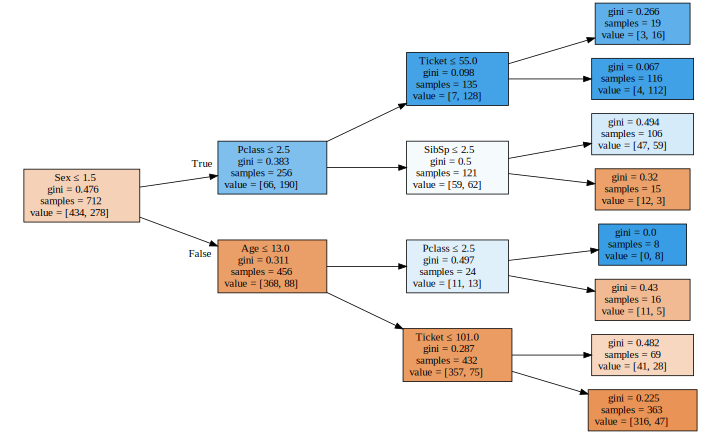

In [49]:
draw_tree(model.estimators_[0], x, precision=3)

Bigger Tree

In [50]:
model = train_model(RandomForestClassifier(1, bootstrap=False))

Training: 100.000 %
Validation: 83.799 %


## Bagging

In [51]:
model = train_model(RandomForestClassifier(10, bootstrap=False))

Training: 100.000 %
Validation: 87.151 %


 With Bootstrapping

In [52]:
model = train_model(RandomForestClassifier(10))

Training: 98.034 %
Validation: 82.682 %


In [53]:
preds = np.stack([tree.predict(x_val) for tree in model.estimators_])
preds[:, 0], np.mean(preds[:, 0]), y_val[0]

(array([0., 1., 1., 0., 0., 1., 0., 0., 1., 0.]), 0.4, 1)

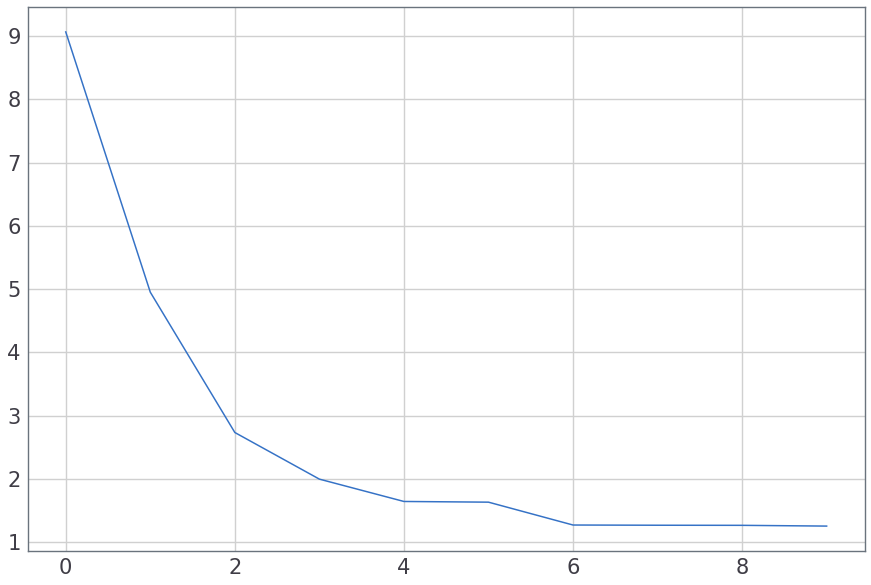

In [54]:
plot([metrics.log_loss(y_val, np.mean(preds[:i+1], axis=0)) for i in range(10)])

## More Trees

In [55]:
model = train_model(RandomForestClassifier(20))

Training: 99.298 %
Validation: 85.475 %


In [56]:
model = train_model(RandomForestClassifier(40))

Training: 99.298 %
Validation: 89.944 %


In [57]:
model = train_model(RandomForestClassifier(80))

Training: 100.000 %
Validation: 86.592 %


## Out Of Bag Error

In [58]:
model = train_model(RandomForestClassifier(40, oob_score=True))

Training: 100.000 %
Validation: 86.592 %
oob: 0.8061797752808989


## Other HyperParameters

In [60]:
model = train_model(RandomForestClassifier(10))

Training: 98.455 %
Validation: 84.358 %


In [79]:
model = train_model(RandomForestClassifier(10, min_samples_leaf=10))

Training: 85.393 %
Validation: 86.592 %


In [180]:
model = train_model(RandomForestClassifier(10, min_samples_leaf=10, max_features=0.5))

Training: 85.112 %
Validation: 84.916 %


## Final Model

In [ ]:
model = train_model(RandomForestClassifier(5, min_samples_leaf=10, max_features=0.5))